In [1]:
import wbgapi as wb
#USA and Canada
country_codes = ["USA", "CAN"]
#Indicators for GDP (Gross Domestic Product) and GNI per capita (Income per Capita)
indicator_ids = ["NY.GDP.MKTP.CD", "NY.GNP.PCAP.CD"]
#Fetching Indicators
indicator_info = wb.series.info(indicator_ids)
#Recent years data
dataframe = wb.data.DataFrame(indicator_ids, country_codes, mrv=5)
dataframe = dataframe.reset_index()
#Melting the dataframe to a long format
df_long = dataframe.melt(id_vars=['economy', 'series'], var_name='year', value_name='value')
#Pivot Table
df_plot = df_long.pivot_table(values='value', index=['year', 'economy'], columns='series')

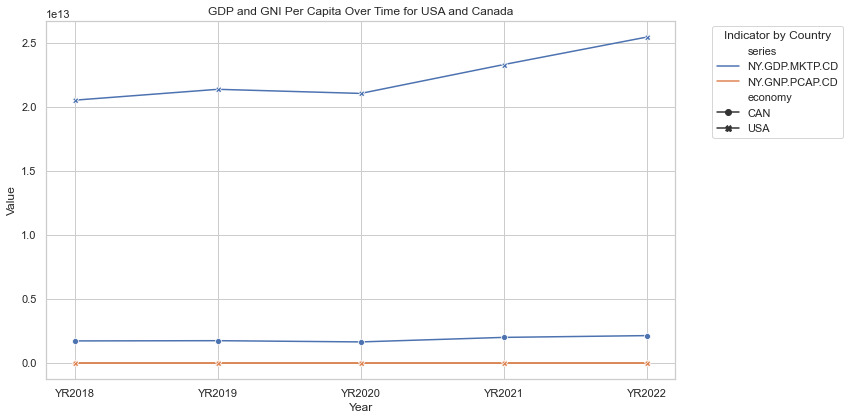

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_long is the DataFrame in long format obtained from the previous steps
# Example: df_long = dataframe.melt(id_vars=['economy', 'series'], var_name='year', value_name='value')

# Setting the style of the plot
sns.set(style="whitegrid")

# Creating a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='year', y='value', hue='series', style='economy', markers=True, dashes=False)

# Adding plot title and labels
plt.title('GDP and GNI Per Capita Over Time for USA and Canada')
plt.xlabel('Year')
plt.ylabel('Value')

# Adding a legend
plt.legend(title='Indicator by Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


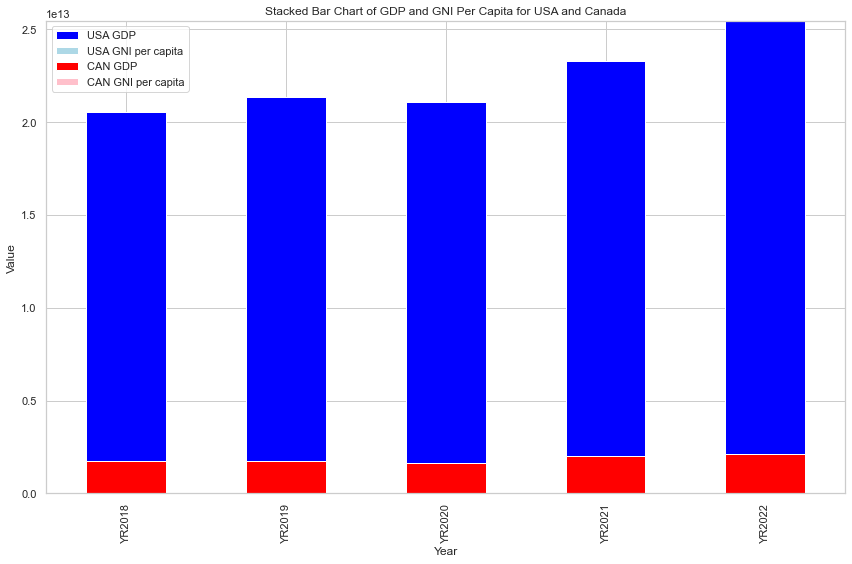

In [6]:
df_long['year'] = df_long['year'].astype(str)

# We pivot the data to have economies as columns and years as rows
df_pivot = df_long.pivot_table(values='value', index='year', columns=['economy', 'series'], fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# We need to create a bottom series for the stack
bottom_usa = df_pivot[('USA', 'NY.GDP.MKTP.CD')]
bottom_can = df_pivot[('CAN', 'NY.GDP.MKTP.CD')]

# Plot for USA
df_pivot[('USA', 'NY.GDP.MKTP.CD')].plot(kind='bar', stacked=True, color='blue', ax=ax, label='USA GDP')
df_pivot[('USA', 'NY.GNP.PCAP.CD')].plot(kind='bar', stacked=True, bottom=bottom_usa, color='lightblue', ax=ax, label='USA GNI per capita')

# Plot for Canada
df_pivot[('CAN', 'NY.GDP.MKTP.CD')].plot(kind='bar', stacked=True, color='red', ax=ax, label='CAN GDP')
df_pivot[('CAN', 'NY.GNP.PCAP.CD')].plot(kind='bar', stacked=True, bottom=bottom_can, color='pink', ax=ax, label='CAN GNI per capita')

# Adding titles and labels
ax.set_title('Stacked Bar Chart of GDP and GNI Per Capita for USA and Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Display the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

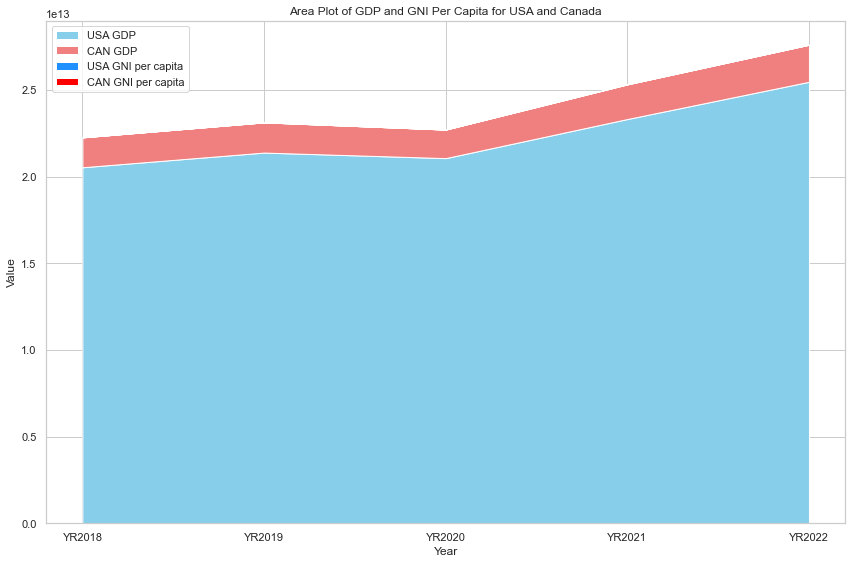

In [7]:
df_long['year'] = df_long['year'].astype(str)

# Pivot the data to get separate columns for each series for each country
df_pivot = df_long.pivot_table(values='value', index='year', columns=['economy', 'series'], fill_value=0)

# Prepare the data for the area plot
years = df_pivot.index
usa_gdp = df_pivot[('USA', 'NY.GDP.MKTP.CD')]
can_gdp = df_pivot[('CAN', 'NY.GDP.MKTP.CD')]
usa_gni = df_pivot[('USA', 'NY.GNP.PCAP.CD')]
can_gni = df_pivot[('CAN', 'NY.GNP.PCAP.CD')]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Creating the area plot
ax.stackplot(years, usa_gdp, can_gdp, usa_gni, can_gni, labels=['USA GDP', 'CAN GDP', 'USA GNI per capita', 'CAN GNI per capita'],
             colors=['skyblue', 'lightcoral', 'dodgerblue', 'red'])

# Adding titles and labels
ax.set_title('Area Plot of GDP and GNI Per Capita for USA and Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Display the legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()